## SQL using Ollama, ChromaDB

In [1]:
# %pip install 'vanna[chromadb]'

In [2]:
from vanna.ollama import Ollama
from vanna.chromadb import ChromaDB_VectorStore

In [3]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

vn = MyVanna(config={'model': 'llama3:8b'})

In [4]:
vn.connect_to_sqlite('../SQLite datacleaning db/world_layoffs.db')

## Training
You only need to train once. Do not train again unless you want to add more training data.

In [ ]:
# df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

# for ddl in df_ddl['sql'].to_list():
#   vn.train(ddl=ddl)

In [ ]:

# # The following are methods for adding training data. Make sure you modify the examples to match your database.

# # DDL statements are powerful because they specify table names, colume names, types, and potentially relationships
# vn.train(ddl="""
#     CREATE TABLE IF NOT EXISTS layoffs_staging2 (
#         company TEXT,
#         location TEXT,
#         industry TEXT,
#         total_laid_off TEXT,
#         percentage_laid_off TEXT,
#         stage TEXT,
#         country TEXT,
#         funds_raised_millions TEXT, 
#         new_date date
#     )
# """)

# Sometimes you may want to add documentation about your business terminology or definitions.
# vn.train(documentation="Our business defines OTIF score as the percentage of orders that are delivered on time and in full")

# You can also add SQL queries to your training data. This is useful if you have some queries already laying around. You can just copy and paste those from your editor to begin generating new SQL.
# vn.train(sql="SELECT * FROM my-table WHERE name = 'John Doe'")


In [ ]:
# # At any time you can inspect what training data the package is able to reference
# training_data = vn.get_training_data()
# training_data

In [ ]:
# You can remove training data if there's obsolete/incorrect information. 
# vn.remove_training_data(id='1-ddl')


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE `layoffs_staging2` (\n        `company` TEXT,\n        `location` TEXT,\n        `industry` TEXT,\n        `total_laid_off` INT,\n        `percentage_laid_off` INT,\n        `date` DATE,\n        `stage` TEXT,\n        `country` TEXT,\n        `funds_raised_millions` INT)\n\n\n    CREATE TABLE IF NOT EXISTS layoffs_staging2 (\n        company TEXT,\n        location TEXT,\n        industry TEXT,\n        total_laid_off TEXT,\n        percentage_laid_off TEXT,\n        stage TEXT,\n        country TEXT,\n        funds_raised_millions TEXT, \n        new_date date\n    )\n\n\n\nYou may use the follo

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


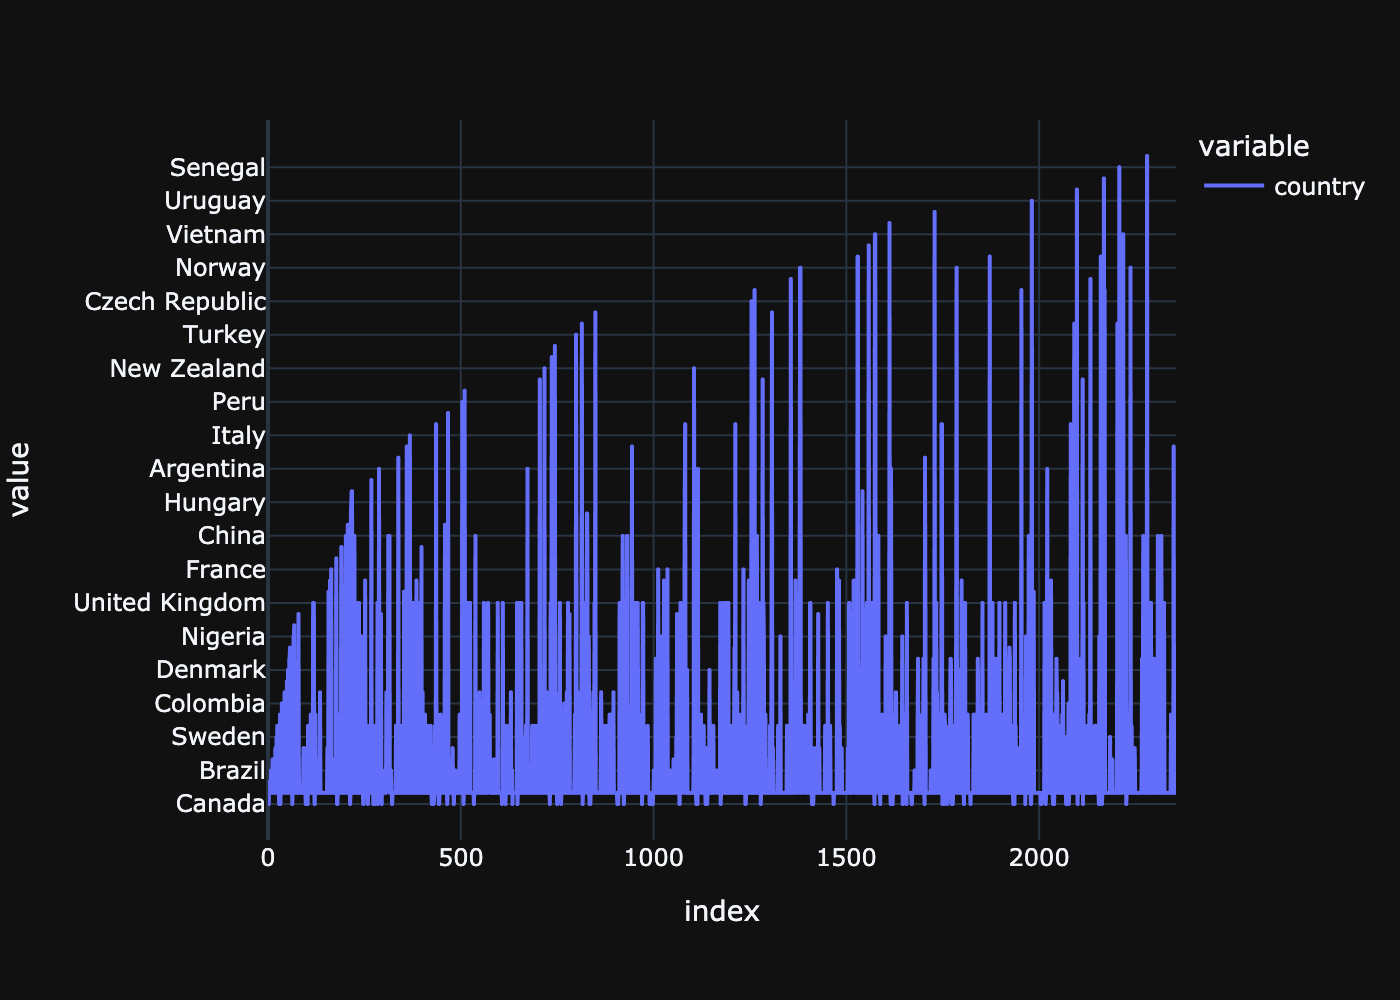

('SELECT country FROM layoffs_staging2;',
             country
 0            Canada
 1     United States
 2            Canada
 3           Ireland
 4     United States
 ...             ...
 2351  United States
 2352  United States
 2353  United States
 2354  United States
 2355  United States
 
 [2356 rows x 1 columns],
 None)

In [5]:
vn.ask(question='which countries had total layoffs from layoffs_staging2')

Number of requested results 10 is greater than number of elements in index 5, updating n_results = 5
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE `layoffs_staging2` (\n        `company` TEXT,\n        `location` TEXT,\n        `industry` TEXT,\n        `total_laid_off` INT,\n        `percentage_laid_off` INT,\n        `date` DATE,\n        `stage` TEXT,\n        `country` TEXT,\n        `funds_raised_millions` INT)\n\n\n    CREATE TABLE IF NOT EXISTS layoffs_staging2 (\n        company TEXT,\n        location TEXT,\n        industry TEXT,\n        total_laid_off TEXT,\n        percentage_laid_off TEXT,\n        stage TEXT,\n        country TEXT,\n        funds_raised_millions TEXT, \n        new_date date\n    )\n\n\n\nYou may use the follo

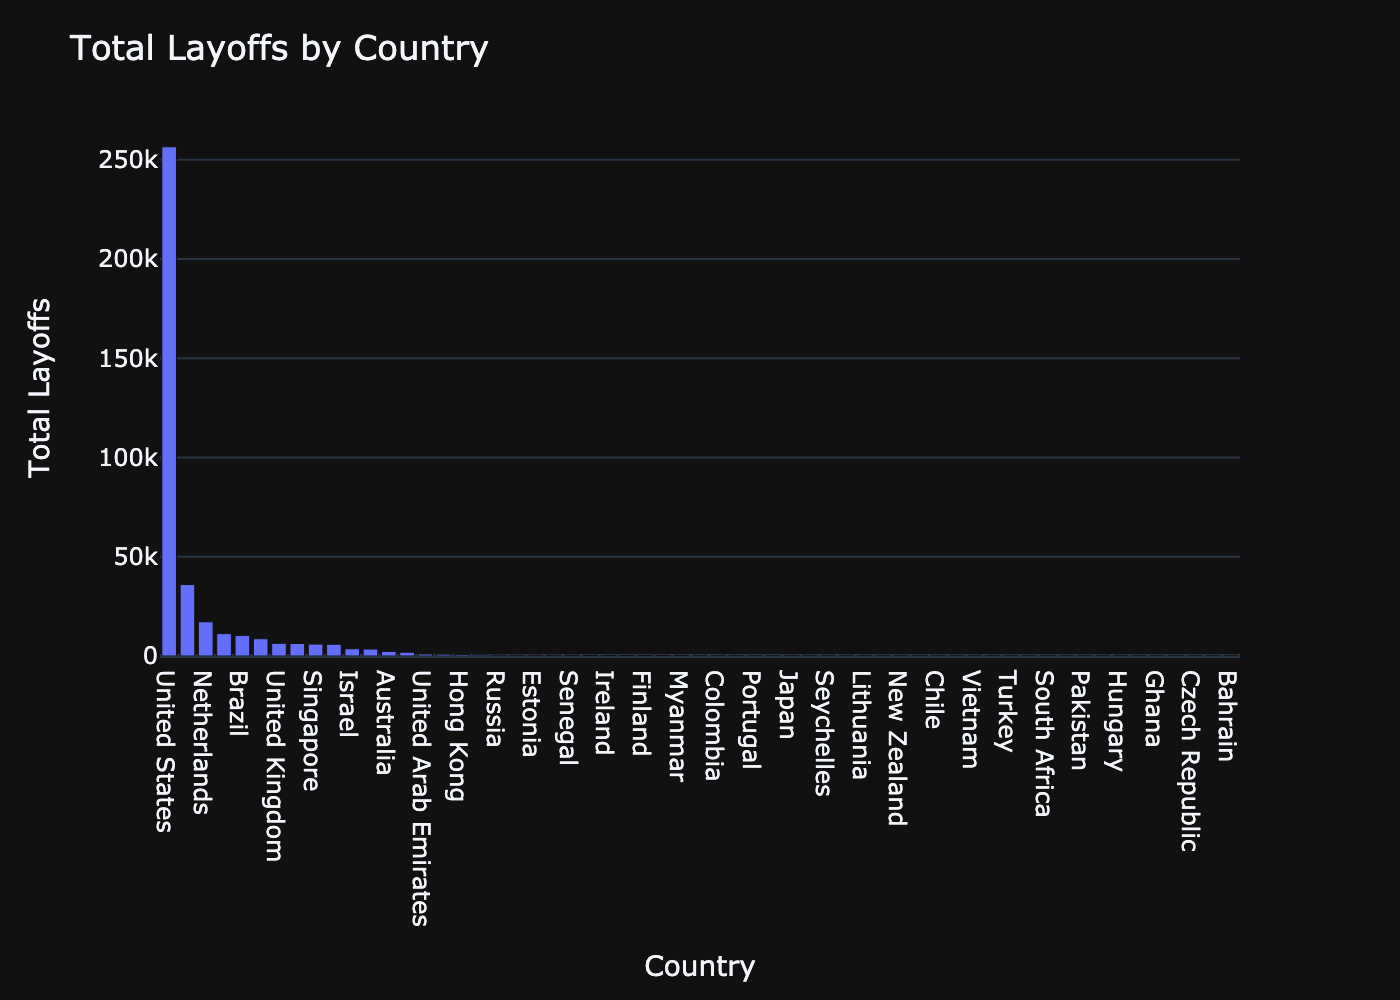

('SELECT country, SUM(total_laid_off) AS total_layoffs  \nFROM layoffs_staging2  \nGROUP BY country  \nORDER BY total_layoffs DESC;',
                  country  total_layoffs
 0          United States       256559.0
 1                  India        35993.0
 2            Netherlands        17220.0
 3                 Sweden        11264.0
 4                 Brazil        10391.0
 5                Germany         8701.0
 6         United Kingdom         6398.0
 7                 Canada         6319.0
 8              Singapore         5995.0
 9                  China         5905.0
 10                Israel         3638.0
 11             Indonesia         3521.0
 12             Australia         2324.0
 13               Nigeria         1882.0
 14  United Arab Emirates          995.0
 15                France          915.0
 16             Hong Kong          730.0
 17               Austria          570.0
 18                Russia          400.0
 19                 Kenya          349.0
 20  

In [6]:
vn.ask(question='which countries had total layoffs from layoffs_staging2 order by total_laid_off descending')

Number of requested results 10 is greater than number of elements in index 6, updating n_results = 6
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE `layoffs_staging2` (\n        `company` TEXT,\n        `location` TEXT,\n        `industry` TEXT,\n        `total_laid_off` INT,\n        `percentage_laid_off` INT,\n        `date` DATE,\n        `stage` TEXT,\n        `country` TEXT,\n        `funds_raised_millions` INT)\n\n\n    CREATE TABLE IF NOT EXISTS layoffs_staging2 (\n        company TEXT,\n        location TEXT,\n        industry TEXT,\n        total_laid_off TEXT,\n        percentage_laid_off TEXT,\n        stage TEXT,\n        country TEXT,\n        funds_raised_millions TEXT, \n        new_date date\n    )\n\n\n\nYou may use the follo

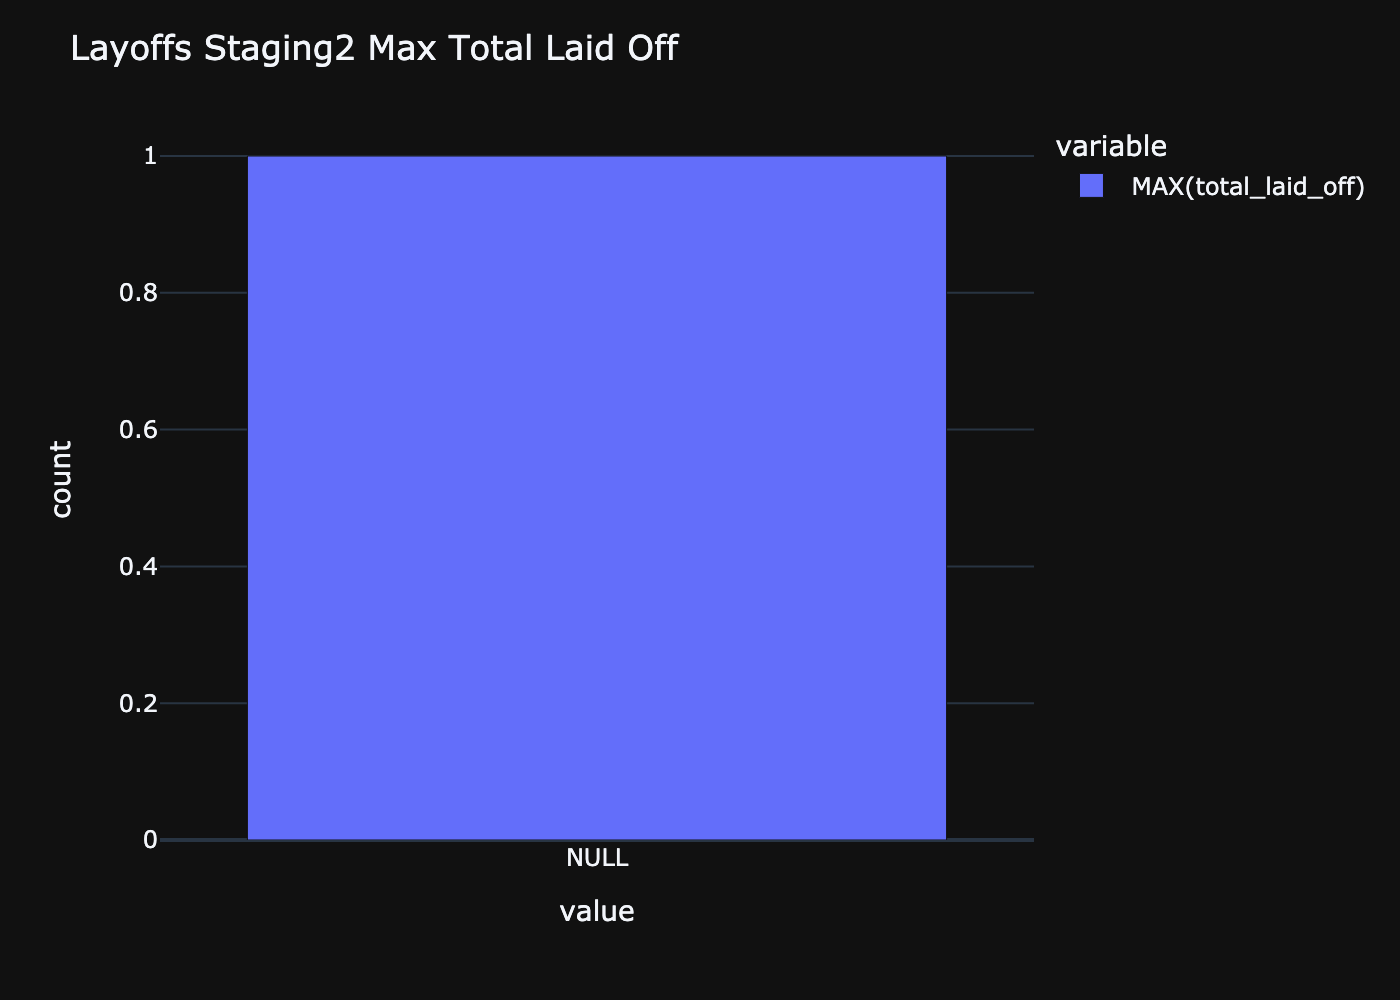

('SELECT MAX(total_laid_off) FROM layoffs_staging2;',
   MAX(total_laid_off)
 0                NULL,
 None)

In [8]:
vn.ask(question='run query: SELECT MAX(total_laid_off) FROM layoffs_staging2;')

Number of requested results 10 is greater than number of elements in index 7, updating n_results = 7
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\n\n    CREATE TABLE IF NOT EXISTS layoffs_staging2 (\n        company TEXT,\n        location TEXT,\n        industry TEXT,\n        total_laid_off TEXT,\n        percentage_laid_off TEXT,\n        stage TEXT,\n        country TEXT,\n        funds_raised_millions TEXT, \n        new_date date\n    )\n\n\nCREATE TABLE `layoffs_staging2` (\n        `company` TEXT,\n        `location` TEXT,\n        `industry` TEXT,\n        `total_laid_off` INT,\n        `percentage_laid_off` INT,\n        `date` DATE,\n        `stage` TEXT,\n        `country` TEXT,\n        `funds_raised_millions` INT)\n\n\nYou may use the follo

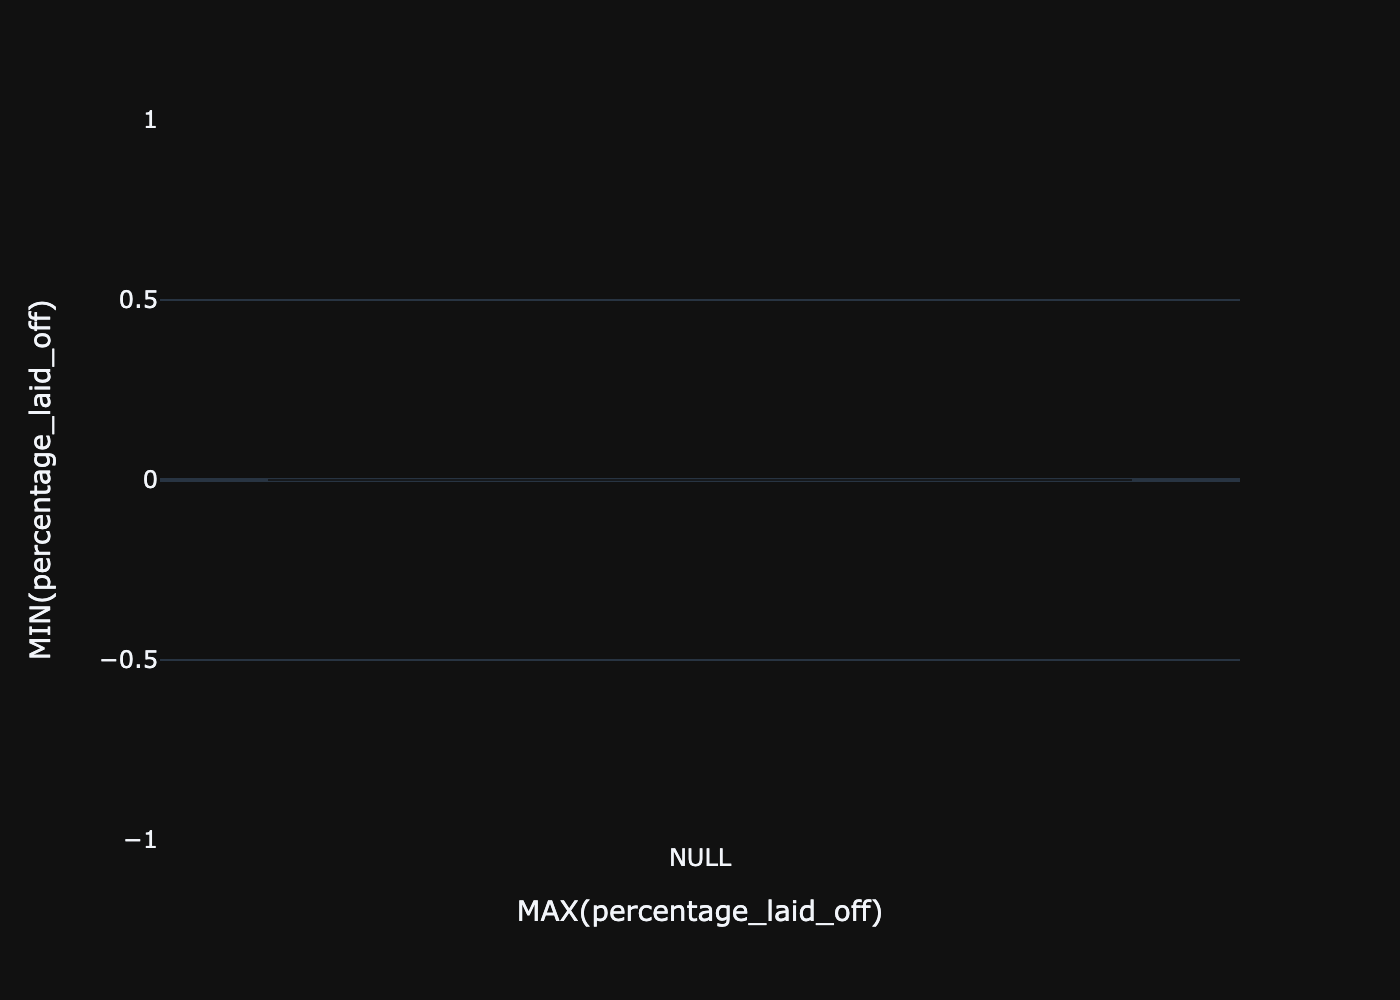

('SELECT MAX(percentage_laid_off),  MIN(percentage_laid_off) FROM layoffs_staging2 WHERE percentage_laid_off IS NOT NULL;',
   MAX(percentage_laid_off)  MIN(percentage_laid_off)
 0                     NULL                         0,
 None)

In [9]:
vn.ask(question='run query: SELECT MAX(percentage_laid_off),  MIN(percentage_laid_off) FROM layoffs_staging2 WHERE percentage_laid_off IS NOT NULL;')

Number of requested results 10 is greater than number of elements in index 9, updating n_results = 9
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE `layoffs_staging2` (\n        `company` TEXT,\n        `location` TEXT,\n        `industry` TEXT,\n        `total_laid_off` INT,\n        `percentage_laid_off` INT,\n        `date` DATE,\n        `stage` TEXT,\n        `country` TEXT,\n        `funds_raised_millions` INT)\n\n\n    CREATE TABLE IF NOT EXISTS layoffs_staging2 (\n        company TEXT,\n        location TEXT,\n        industry TEXT,\n        total_laid_off TEXT,\n        percentage_laid_off TEXT,\n        stage TEXT,\n        country TEXT,\n        funds_raised_millions TEXT, \n        new_date date\n    )\n\n\n\nYou may use the follo

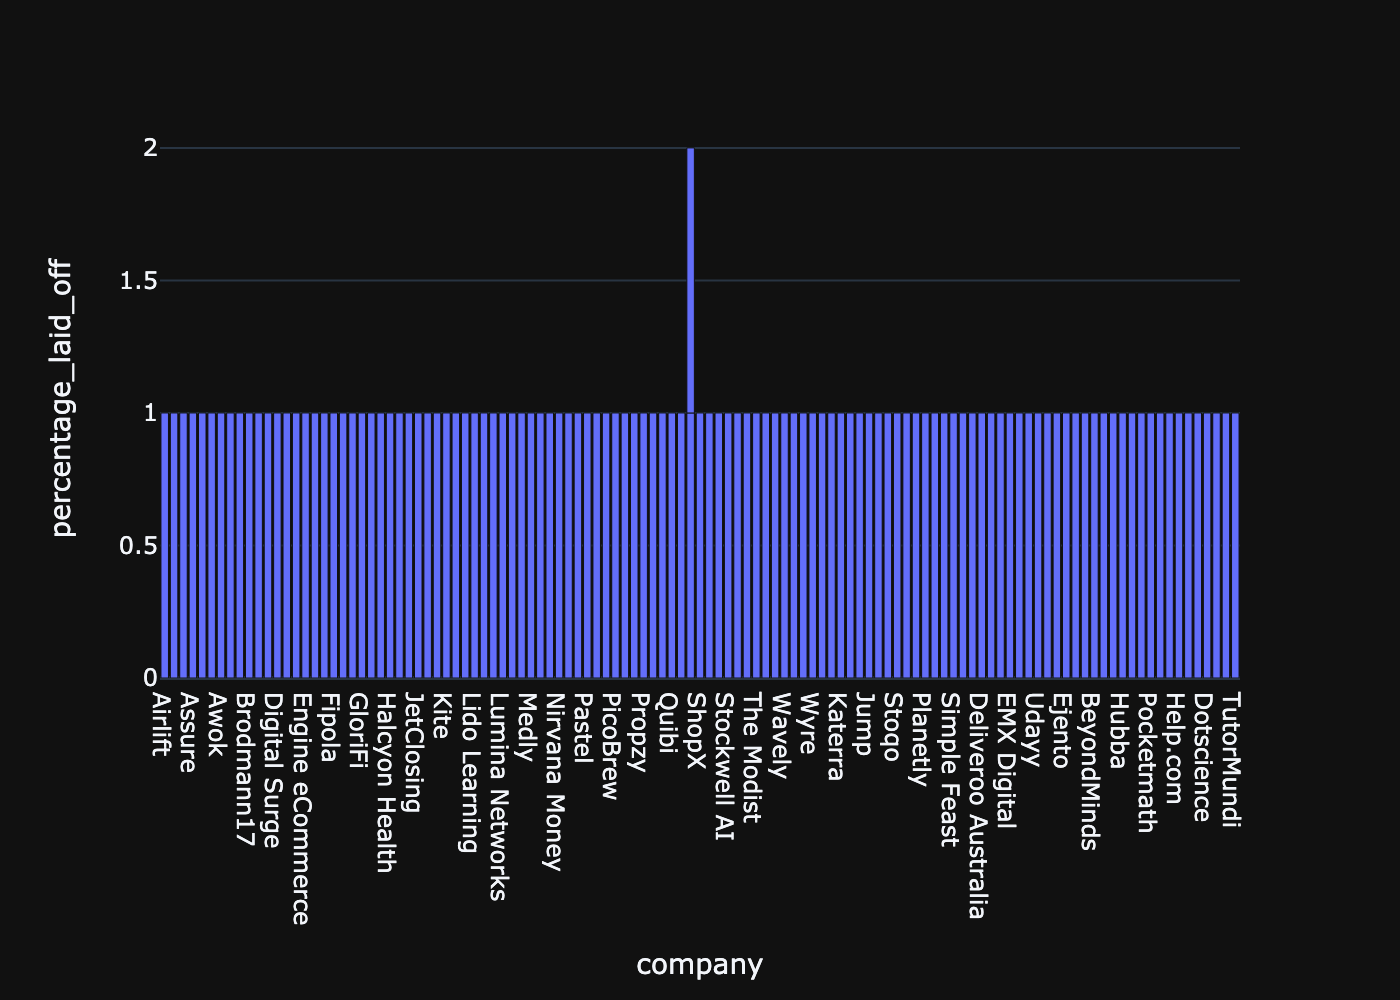

('SELECT * FROM layoffs_staging2 WHERE percentage_laid_off = 1 ORDER BY total_laid_off DESC;',
             company        location  industry total_laid_off  \
 0           Airlift          Lahore  Consumer           NULL   
 1        Airy Rooms         Jakarta  Consumer           NULL   
 2     Arch Oncology        Brisbane  Consumer           NULL   
 3            Assure  Salt Lake City  Consumer           NULL   
 4    Aura Financial     SF Bay Area  Consumer           NULL   
 ..              ...             ...       ...            ...   
 111       Limelight   New York City  Consumer             13   
 112      Dotscience          London  Consumer             10   
 113            Atsu         Seattle  Consumer              6   
 114            Dark     SF Bay Area  Consumer              6   
 115      TutorMundi       Sao Paulo  Consumer              4   
 
      percentage_laid_off        date     stage         country  \
 0                      1   7/12/2022  Series B        P

In [11]:
vn.ask(question='run query: SELECT * FROM layoffs_staging2 WHERE percentage_laid_off = 1 ORDER BY total_laid_off DESC;')

In [ ]:
vn.ask(question='')

In [ ]:
vn.ask(question='')

In [ ]:
vn.ask(question='')

In [ ]:
vn.ask(question='')